In [1]:
import numpy as np
import gym
import random

# Part-1: Solving Policy Iteration on the OfficeEnv, which has 9 states and 6 actions.


In [26]:
# Solving policy iteration

states = [0,1,2,3,4,5,6,7,8]
actions = [0,1,2,3,4,5]

P = np.zeros((9, 6, 9))  
R = np.zeros((9, 6, 9))  

P[0,4,0] = 1.0
P[1,4,1] = 1.0
P[3,4,3] = 1.0
P[4,4,4] = 1.0
P[5,4,5] = 1.0
P[6,4,6] = 1.0
P[7,4,7] = 1.0
P[8,4,8] = 1.0
P[2,5,2] = 1.0


R[0,4,0] = 5
R[0,5,0] = -10
R[1,4,1] = 5
R[1,5,1] = -10
R[8,4,8] = 5
R[8,5,8] = -10
R[2,5,2] = 50
R[3,4,3] = 5
R[3,5,3] = -10
R[4,4,4] = 5
R[4,5,4] = -10
R[5,4,5] = 5
R[5,5,5] = -10
R[6,4,6] = 5
R[6,5,6] = -10
R[7,4,7] = 5
R[7,5,7] = -10


gamma = 0.9

policy = [0 for s in range(9)]
V = np.zeros(9)

print("Initial policy", policy)


is_value_changed = True
iterations = 0
while is_value_changed:
    is_value_changed = False
    iterations += 1
    for s in range(9):
        V[s] = sum([P[s,policy[s],s1] * (R[s,policy[s],s1] + gamma*V[s1]) for s1 in range(9)])

    for s in range(9):
        q_best = V[s]
        for a in range(6):
            q_sa = sum([P[s, a, s1] * (R[s, a, s1] + gamma * V[s1]) for s1 in range(9)])
            if q_sa > q_best:
                print("State", s, ": q_selected_action", q_sa, "q_best_action", q_best)
                policy[s] = a
                q_best = q_sa
                is_value_changed = True

    print("Iterations:", iterations)

print("Optimal policy")
print(policy)
print(V)

Initial policy [0, 0, 0, 0, 0, 0, 0, 0, 0]
State 0 : q_selected_action 5.0 q_best_action 0.0
State 1 : q_selected_action 5.0 q_best_action 0.0
State 2 : q_selected_action 50.0 q_best_action 0.0
State 3 : q_selected_action 5.0 q_best_action 0.0
State 4 : q_selected_action 5.0 q_best_action 0.0
State 5 : q_selected_action 5.0 q_best_action 0.0
State 6 : q_selected_action 5.0 q_best_action 0.0
State 7 : q_selected_action 5.0 q_best_action 0.0
State 8 : q_selected_action 5.0 q_best_action 0.0
Iterations: 1
State 0 : q_selected_action 9.5 q_best_action 5.0
State 1 : q_selected_action 9.5 q_best_action 5.0
State 2 : q_selected_action 95.0 q_best_action 50.0
State 3 : q_selected_action 9.5 q_best_action 5.0
State 4 : q_selected_action 9.5 q_best_action 5.0
State 5 : q_selected_action 9.5 q_best_action 5.0
State 6 : q_selected_action 9.5 q_best_action 5.0
State 7 : q_selected_action 9.5 q_best_action 5.0
State 8 : q_selected_action 9.5 q_best_action 5.0
Iterations: 2
State 0 : q_selected_actio

Part-2: Using Practical-3 as a basis for visual demonstration



In [3]:
from google.colab import drive
import sys
drive.mount('/content/drive')
sys.path.insert(0,'/content/drive/MyDrive/Colab_Notebooks')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import mdp

In [8]:
transition_probs = {
    's0': {
        'a0': {'s0': 0.5, 's1': 0.3, 's2': 0.2},
        'a1': {'s0': 1},
        'a2': {'s0': 1},
        'a3': {'s0': 1},
        'a4': {'s0': 1},
        'a5': {'s0': 1}
    },
    's1': {
        'a0': {'s1': 0.5, 's2': 0.5},
        'a1': {'s0': 1},
        'a2': {'s0': 1},
        'a3': {'s1': 0.5, 's4': 0.3, 's7': 0.2},
        'a4': {'s1': 1},
        'a5': {'s1': 1}
    },
    's2': {
        'a0': {'s2': 1},
        'a1': {'s2': 0.5, 's1': 0.3, 's0': 0.2},
        'a2': {'s2': 1},
        'a3': {'s2': 1},
        'a4': {'s2': 1},
        'a5': {'s2': 1}
    },
    's3': {
        'a0': {'s3': 0.5, 's4': 0.3, 's5': 0.2},
        'a1': {'s3': 1},
        'a2': {'s3': 1},
        'a3': {'s3': 1},
        'a4': {'s3': 1},
        'a5': {'s3': 1}
    },
    's4': {
        'a0': {'s4': 0.5, 's5': 0.5},
        'a1': {'s4': 0.5, 's3': 0.5},
        'a2': {'s4': 0.5, 's7': 0.5},
        'a3': {'s4': 0.5, 's1': 0.5},
        'a4': {'s4': 1},
        'a5': {'s4': 1}
    },
    's5': {
        'a0': {'s5': 1},
        'a1': {'s5': 1},
        'a2': {'s5': 1},
        'a3': {'s5': 0.5, 's4': 0.3, 's3': 0.2},
        'a4': {'s5': 1},
        'a5': {'s5': 1}
    },
    's6': {
        'a0': {'s6': 0.5, 's7': 0.3, 's8': 0.2},
        'a1': {'s6': 1},
        'a2': {'s6': 1},
        'a3': {'s6': 1},
        'a4': {'s6': 1},
        'a5': {'s6': 1}
    },
    's7': {
        'a0': {'s7': 0.5, 's8': 0.5},
        'a1': {'s7': 0.5, 's6': 0.5},
        'a2': {'s7': 0.5, 's4': 0.3, 's1': 0.2},
        'a3': {'s7': 1},
        'a4': {'s7': 1},
        'a5': {'s7': 1}
    },
    's8': {
        'a0': {'s8': 1},
        'a1': {'s8': 0.5, 's7': 0.3, 's6': 0.2},
        'a2': {'s8': 1},
        'a3': {'s8': 1},
        'a4': {'s8': 1},
        'a5': {'s8': 1}
    }
}
rewards = {
    's1': {'a4': {'s1': +5}, 'a5': {'s1': -10}},
    's2': {'a5': {'s2': +50}},
    's3': {'a4': {'s3': +5}, 'a5': {'s3': -10}},
    's4': {'a4': {'s4': +5}, 'a5': {'s4': -10}},
    's5': {'a4': {'s5': +5}, 'a5': {'s5': -10}},
    's6': {'a4': {'s6': +5}, 'a5': {'s6': -10}},
    's7': {'a4': {'s7': +5}, 'a5': {'s7': -10}},
    's8': {'a4': {'s8': +5}, 'a5': {'s8': -10}},
    's0': {'a4': {'s0': +5}, 'a5': {'s0': -10}}
}

from mdp import MDP
mdp = MDP(transition_probs, rewards, initial_state='s0')

In [11]:
from mdp import has_graphviz
from IPython.display import display
print("Graphviz available:", has_graphviz)

Graphviz available: True


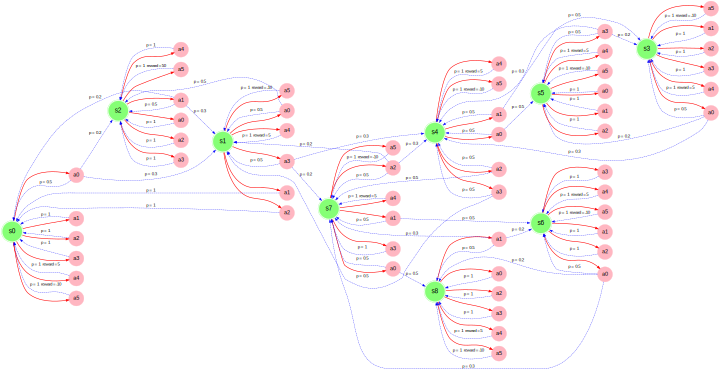

In [12]:
if has_graphviz:
    from mdp import plot_graph, plot_graph_with_state_values, plot_graph_optimal_strategy_and_state_values
    display(plot_graph(mdp))

In [13]:
# Computing the Q-value 
def get_action_value(mdp, state_values, state, action, gamma):

    
    Q = 0  
    for s in mdp.get_all_states():
      Q = Q + mdp.get_transition_prob(state, action, s)*(mdp.get_reward(state, action, s) + \
                                                               gamma*state_values[s]) 
    return Q

In [14]:
def get_new_state_value(mdp, state_values, state, gamma):
    import numpy as np

    if mdp.is_terminal(state):
        return 0

    A = [a for a in mdp.get_possible_actions(state)]
    v = np.zeros(len(mdp.get_possible_actions(state)))
    i = 0
    
    for a in mdp.get_possible_actions(state):
      v[i] = get_action_value(mdp, state_values, state, a, gamma)
      A[i] = a
      i = i+1

    V = {A[np.argmax(v)]:v[np.argmax(v)]}
    
    return V

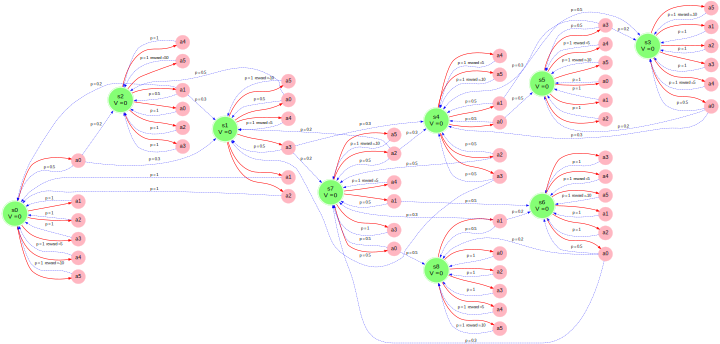

iter    0   |   diff: 50.00000   |   V(s0) = 0.000   V(s1) = 0.000   V(s2) = 0.000   V(s3) = 0.000   V(s4) = 0.000   V(s5) = 0.000   V(s6) = 0.000   V(s7) = 0.000   V(s8) = 0.000
iter    1   |   diff: 45.00000   |   V(s0) = 5.000   V(s1) = 5.000   V(s2) = 50.000   V(s3) = 5.000   V(s4) = 5.000   V(s5) = 5.000   V(s6) = 5.000   V(s7) = 5.000   V(s8) = 5.000
iter    2   |   diff: 40.50000   |   V(s0) = 12.600   V(s1) = 24.750   V(s2) = 95.000   V(s3) = 9.500   V(s4) = 9.500   V(s5) = 9.500   V(s6) = 9.500   V(s7) = 9.500   V(s8) = 9.500
iter    3   |   diff: 36.45000   |   V(s0) = 29.453   V(s1) = 53.888   V(s2) = 135.500   V(s3) = 13.550   V(s4) = 15.413   V(s5) = 13.550   V(s6) = 13.550   V(s7) = 13.550   V(s8) = 13.550
iter    4   |   diff: 32.80500   |   V(s0) = 52.193   V(s1) = 85.224   V(s2) = 171.950   V(s3) = 17.195   V(s4) = 31.185   V(s5) = 17.195   V(s6) = 17.195   V(s7) = 19.959   V(s8) = 17.195
iter    5   |   diff: 29.52450   |   V(s0) = 77.449   V(s1) = 115.728   V(s2) = 2

In [15]:
gamma = 0.9            
num_iter = 100         
min_difference = 0.001

state_values = {s: 0 for s in mdp.get_all_states()}

if has_graphviz:
    display(plot_graph_with_state_values(mdp, state_values))

for i in range(num_iter):

    new_state_values = {}
    for s in mdp.get_all_states():
      nsv = get_new_state_value(mdp, state_values, s, gamma)
      a = list(nsv)[0]
      v = nsv[a]
      new_state_values[s] = v

    assert isinstance(new_state_values, dict)

    diff = max(abs(new_state_values[s] - state_values[s])
               for s in mdp.get_all_states())
    print("iter %4i   |   diff: %6.5f   |   " % (i, diff), end="")
    print('   '.join("V(%s) = %.3f" % (s, v) for s, v in state_values.items()))
    state_values = new_state_values

    if diff < min_difference:
        print("Terminated")
        break

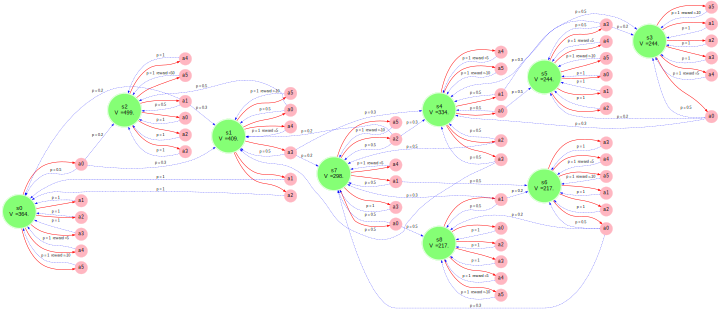

In [16]:
if has_graphviz:
    display(plot_graph_with_state_values(mdp, state_values))

In [18]:
print("Final state values:", state_values)



Final state values: {'s0': 364.44952921791173, 's1': 409.0776283914654, 's2': 499.98671930055633, 's3': 244.23509991257328, 's4': 334.6974631022092, 's5': 244.23509991257328, 's6': 217.58982202762598, 's7': 298.18356377839257, 's8': 217.58982202762598}


In [19]:
def get_optimal_action(mdp, state_values, state, gamma):
    if mdp.is_terminal(state):
        return None

    nsv = get_new_state_value(mdp, state_values, state, gamma)
    a = list(nsv)[0]

    return a

In [21]:
gamma=0.9
print(get_optimal_action(mdp, state_values, 's0', gamma))
print(get_optimal_action(mdp, state_values, 's2', gamma))

a0
a5


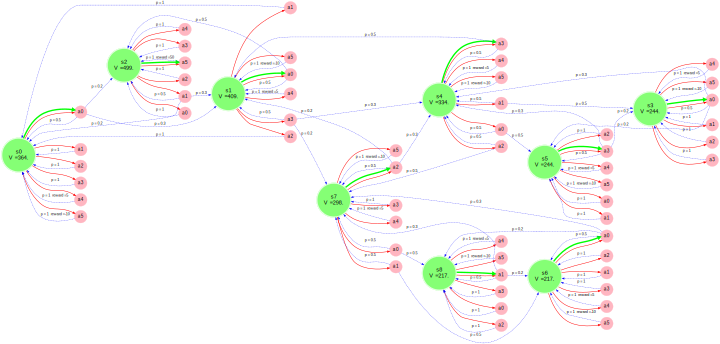

In [22]:
if has_graphviz:
    display(plot_graph_optimal_strategy_and_state_values(mdp, state_values, get_action_value))

In [27]:
# agent's average reward over 10000 steps

s = mdp.reset()
rewards = []
gamma=0.9

for _ in range(10000):
    s, r, done, _ = mdp.step(get_optimal_action(mdp, state_values, s, gamma))
    rewards.append(r)

print("Average reward over 10000 steps: ", np.mean(rewards))



Average reward over 10000 steps:  49.99
